# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 8: Project Reporting and Application: Time Series

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

## Reading: 

- Dimensionality Reduction: PDSW CH5 In Depth: Principal Component Analysis
- Image Recognition: PDSW CH5 Application: A Face Detection Pipeline

## Today

- Midterm Review

- Feature Selection (From last lecture)

- Project Reporting

- Time Series

## Project Reporting

### What should go in a report

### Jupyter notebook (review)
  - Markup
  - Images
  - Latex
  - Slides

### Interactive Graphs
  - Bokeh
  - Plotly

### Dashboards
  - Dash
  - Tableau, PowerBI

## TimeSeries

### Datetime  in python and pandas

- Timestamp
- Period
- TimeDelta

#### Timestamp

In [ ]:
from datetime import datetime

In [6]:
datetime(2017, 11, 2, 19, 45, 55)

datetime.datetime(2017, 11, 2, 19, 45, 55)

In [7]:
print(datetime(2017, 11, 2, 19, 45, 55))

2017-11-02 19:45:55


In [8]:
dates = pd.to_datetime([datetime(2015, 7, 3),
                        '4th of July, 2015',
                        '2015-Jul-6',
                        '07-07-2015',
                        '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [18]:
df = pd.DataFrame({'date': ['2014-07-04',
                    '2014-08-04',
                    '2015-07-04',
                    '2015-08-04'],
                   'val': [2,4,6,8]})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
date    4 non-null object
val     4 non-null int64
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes


In [19]:
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
date    4 non-null datetime64[ns]
val     4 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 144.0 bytes


In [20]:
df.set_index('date', inplace=True)
df

,val
date,
2014-07-04,2
2014-08-04,4
2015-07-04,6
2015-08-04,8


In [21]:
df.index

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', name='date', freq=None)

In [22]:
df['2014-07-04':'2015-07-04']

,val
date,
2014-07-04,2
2014-08-04,4
2015-07-04,6


In [23]:
df['2015']

,val
date,
2015-07-04,6
2015-08-04,8


#### Period

In [67]:
df.index.to_period('M')

PeriodIndex(['2014-07', '2014-08', '2015-07', '2015-08'], dtype='period[M]', name='date', freq='M')

#### Timedelta

In [68]:
df.index[1] - df.index[0]

Timedelta('31 days 00:00:00')

In [69]:
df.index[2] - df.index[0]

Timedelta('365 days 00:00:00')

In [70]:
df.index - df.index[0]

TimedeltaIndex(['0 days', '31 days', '365 days', '396 days'], dtype='timedelta64[ns]', name='date', freq=None)

In [73]:
s = pd.to_datetime(pd.Series(['2014-07-04',
                    '2014-08-04',
                    '2015-07-04',
                    '2015-08-04']))
s

0   2014-07-04
1   2014-08-04
2   2015-07-04
3   2015-08-04
dtype: datetime64[ns]

In [74]:
s - s[0]

0     0 days
1    31 days
2   365 days
3   396 days
dtype: timedelta64[ns]

### Resampling

- **downsampling**: rougher reslution (days -> months)

- **upsampling**: finer resolution (months -> days)

In [29]:
from pandas_datareader import data

twtr = data.DataReader('TWTR', start='2004', end='2018',
                       data_source='yahoo')
twtr.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-27,20.18,21.959999,20.150000,21.680000,21.680000,63611100
2017-10-30,21.40,21.780001,21.059999,21.250000,21.250000,34019400
2017-10-31,21.26,21.559999,20.459999,20.620001,20.620001,28049200
2017-11-01,20.74,20.990000,20.400000,20.610001,20.610001,18801400
2017-11-02,20.50,20.629999,19.639999,19.709999,19.709999,24444626


In [26]:
twtr = twtr['Close']

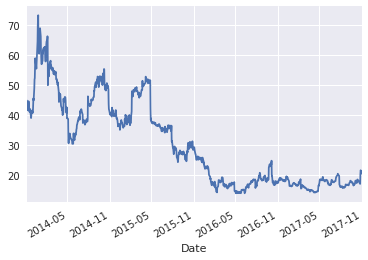

In [103]:
twtr.plot();

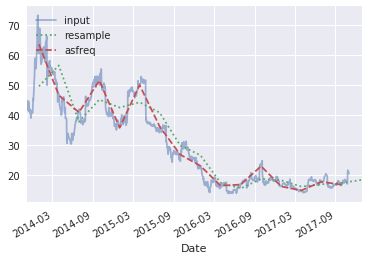

In [116]:
# downsampling to business quarter
twtr.plot(alpha=0.5, style='-')
twtr.resample('BQ').mean().plot(style=':')
twtr.asfreq('BQ').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [117]:
twtr.head()

Date
2013-11-07    44.900002
2013-11-08    41.650002
2013-11-11    42.900002
2013-11-12    41.900002
2013-11-13    42.599998
Name: Close, dtype: float64

In [119]:
twtr.asfreq('BQ').head()

Date
2013-12-31    63.650002
2014-03-31    46.669998
2014-06-30    40.970001
2014-09-30    51.580002
2014-12-31    35.869999
Freq: BQ-DEC, Name: Close, dtype: float64

In [120]:
twtr.resample('BQ').mean().head()

Date
2013-12-31    49.657568
2014-03-31    56.587049
2014-06-30    37.854603
2014-09-30    45.205938
2014-12-31    42.561719
Freq: BQ-DEC, Name: Close, dtype: float64

In [111]:
# what about upsampling?
twtr.asfreq('H').head()

Date
2013-11-07 00:00:00    44.900002
2013-11-07 01:00:00          NaN
2013-11-07 02:00:00          NaN
2013-11-07 03:00:00          NaN
2013-11-07 04:00:00          NaN
Freq: H, Name: Close, dtype: float64

In [121]:
twtr.asfreq('H').head().ffill()

Date
2013-11-07 00:00:00    44.900002
2013-11-07 01:00:00    44.900002
2013-11-07 02:00:00    44.900002
2013-11-07 03:00:00    44.900002
2013-11-07 04:00:00    44.900002
Freq: H, Name: Close, dtype: float64

In [124]:
twtr.asfreq('H', method='ffill').head()

Date
2013-11-07 00:00:00    44.900002
2013-11-07 01:00:00    44.900002
2013-11-07 02:00:00    44.900002
2013-11-07 03:00:00    44.900002
2013-11-07 04:00:00    44.900002
Freq: H, Name: Close, dtype: float64

### Shifting

In [127]:
# apply a frequency to the data
twtr = twtr.asfreq('D', method='ffill')

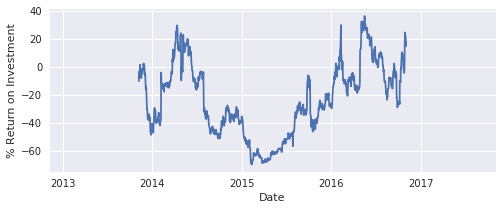

In [136]:
fig = plt.figure(figsize=(8,3))
pROI = 100 * (twtr.tshift(-365) / twtr - 1)
pROI.plot()
plt.ylabel('% Return on Investment');

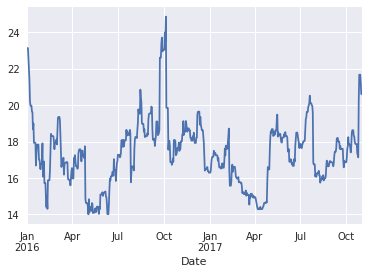

In [138]:
twtr['2016':'2017'].plot();

### Windowing

In [139]:
rolling = twtr.rolling(365, center=True)
rolling

Rolling [window=365,center=True,axis=0]

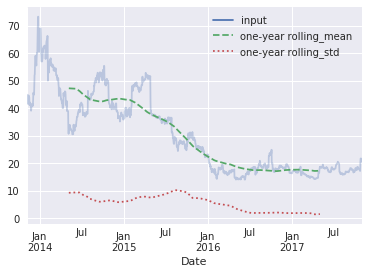

In [140]:
data = pd.DataFrame({'input': twtr,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

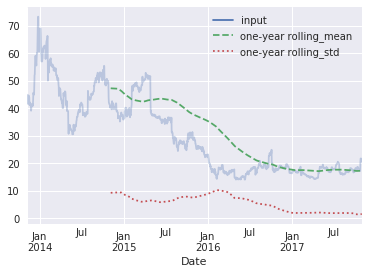

In [143]:
rolling = twtr.rolling(365, center=False)
data = pd.DataFrame({'input': twtr,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## Example:

In [144]:
# !curl -o ../data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1249k    0 1249k    0     0   186k      0 --:--:--  0:00:06 --:--:--  216k


In [146]:
data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [147]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [148]:
data.dropna().describe()

,West,East,Total
count,44512.000000,44512.000000,44512.000000
mean,55.559512,55.930064,111.489576
std,73.608922,80.672775,140.149576
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,30.000000,29.000000,61.000000
75%,73.000000,68.000000,146.000000
max,854.000000,717.000000,1165.000000


In [149]:
%matplotlib inline
import seaborn; seaborn.set()

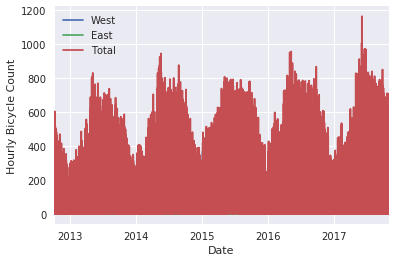

In [150]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

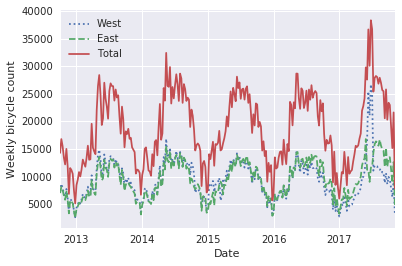

In [151]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

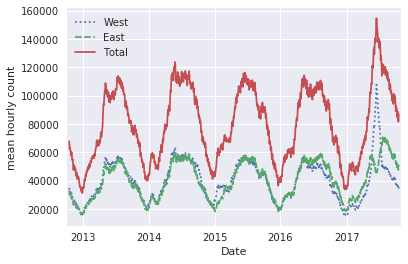

In [152]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

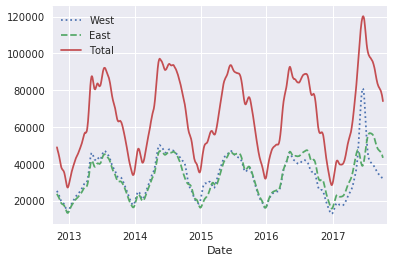

In [153]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

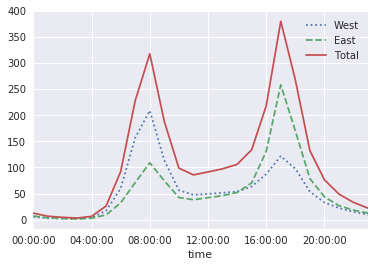

In [155]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 60 * 60 * 4 * np.arange(6)  # sec * min * every4hours
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

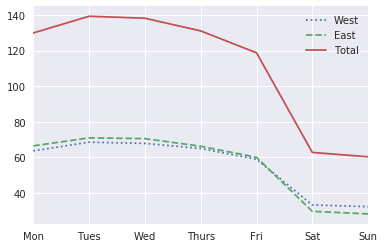

In [156]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [157]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

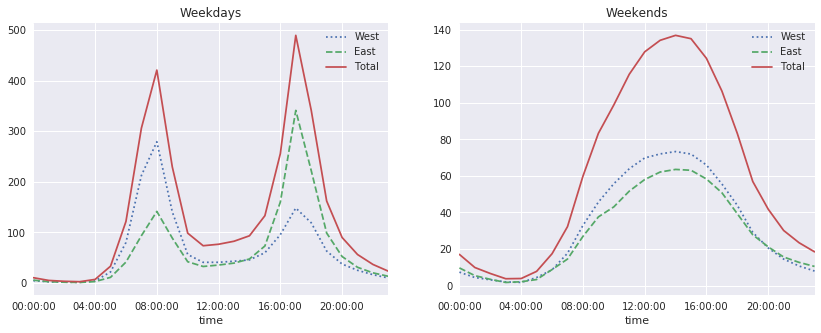

In [159]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);